# COVID-19

## 1. Libraries

In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import matplotlib.dates as mdates
plt.style.use('ggplot')
import matplotlib.colors as mcolors
import seaborn as sns
from matplotlib.gridspec import GridSpec
import pandas_bokeh
pandas_bokeh.output_notebook()
#pd.set_option('plotting.backend', 'pandas_bokeh')
import warnings
warnings.filterwarnings("ignore") 

Loading BokehJS ...

## 2. Functions

In [422]:
def plot_country(country,log_scale=False,size=(12,6)):
    fig, ax = plt.subplots(figsize=size)
    ax.plot(data.loc[country,['Confirmed']],label='Confirmed',c='dodgerblue')
    ax.plot(data.loc[country,['Recovered']],label='Recovered',c='mediumseagreen')
    ax.plot(data.loc[country,['Deaths']],label='Deaths',c='crimson')
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    if log_scale == True:
        ax.set_yscale('log') # Log Scale
    ax.legend(ncol=3)
    plt.title(country);

## 3. Data

In [423]:
# Paths
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
files = []
# Dates
start_date = date(2020,1,22) # First Report
end_date = date.today() - timedelta(days=1)# Today
delta = end_date - start_date # Days from the first report

# Files
for i in range(delta.days+1):
    date = start_date + timedelta(days=i)
    files.append(date.strftime('%m-%d-%Y'))

df = pd.DataFrame()
for f in files:
    if f != '03-13-2020': # there is a bug in this report
        df_aux = pd.read_csv(path+f+'.csv')
        df_aux['Date'] = pd.to_datetime(f)
        df = pd.concat([df,df_aux])
    else:
        df_aux = pd.read_csv(path+f+'.csv')
        df_aux.loc[df_aux['Country/Region']!='China',['Last Update']] = df_aux[df_aux['Country/Region'] != 'China']['Last Update'].str.replace('-11T','-13T')    
        df_aux['Date'] = pd.to_datetime(f)
        df = pd.concat([df,df_aux])
        
# Renaming
df.rename(columns={'Country/Region':'Country'},inplace=True)
df.rename(columns={'Province/State':'Province'},inplace=True)
df['Country'] = df['Country'].str.replace('US','United States')
df['Country'] = df['Country'].str.replace('Jersey','United Kingdom')
df['Country'] = df['Country'].str.replace('UK','United Kingdom')
df['Country'] = df['Country'].str.replace('Guernsey','United Kingdom') 
df['Country'] = df['Country'].str.replace('Mainland China','China')
df['Country'] = df['Country'].str.replace('South Korea','Korea, Republic of')
df['Country'] = df['Country'].str.replace('Korea, South','Korea, Republic of')
df['Country'] = df['Country'].str.replace('North Korea','Korea, North')
df['Country'] = df['Country'].str.replace('Russia','Russian Federation')
df['Country'] = df['Country'].str.replace('Iran','Iran, Islamic Republic of')
df['Country'] = df['Country'].str.replace('Macau','China')
df['Country'] = df['Country'].str.replace('North Macedonia','Macedonia')
df['Country'] = df['Country'].str.replace('Moldova','Moldova, Republic of')
df['Country'] = df['Country'].str.replace('Ivory Coast','Cote d\'Ivoire')
df['Country'] = df['Country'].str.replace('Holy See','Holy See (Vatican City State)')
df['Country'] = df['Country'].str.replace('Congo (Kinshasa)','Congo, The Democratic Republic of the')
df['Country'] = df['Country'].str.replace('Brunei','Brunei Darussalam')
df['Country'] = df['Country'].str.replace('Czechia','Czech Republic')
df['Country'] = df['Country'].str.replace('occupied Palestinian territory','Palestinian Territory')
df['Country'] = df['Country'].str.replace('Eswatini','Swaziland')
df['Country'] = df['Country'].str.replace('Curacao','Netherlands')

# Hong Kong Macau Taiwan
df.loc[df['Province']=='Hong Kong',['Country']] = 'Hong Kong'
df.loc[df['Province']=='Macau',['Country']] = 'China'
df.loc[df['Province']=='Taiwan',['Country']] = 'Taiwan'
df.loc[df['Country'].str.startswith('Tai'),['Country']] = 'Taiwan'

### 3.1 Data Grouped by Country and Date

In [424]:
data = df.groupby(['Country','Date'])['Confirmed','Recovered','Deaths'].sum()

In [425]:
# # Country Codes
# country_codes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
# country_codes.rename(columns={'COUNTRY':'Country','CODE':'Code'},inplace=True)
# country_codes.drop(columns='GDP (BILLIONS)',inplace=True)
# country_codes.head()
# # Merge
# #df = df.fillna('unknow')
# data = pd.merge(data,country_codes,on=['Country'])

## 4. Plots

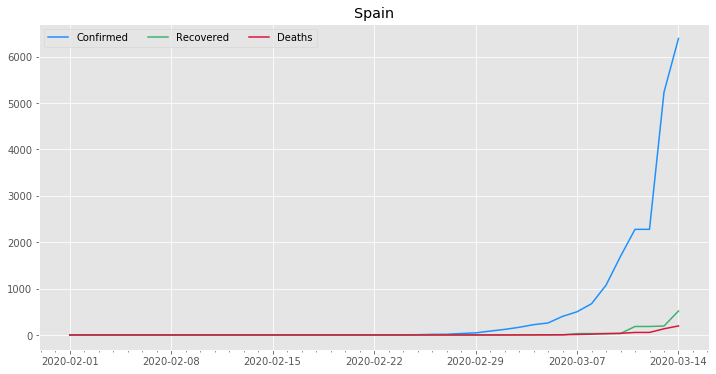

In [426]:
plot_country(country='Spain')

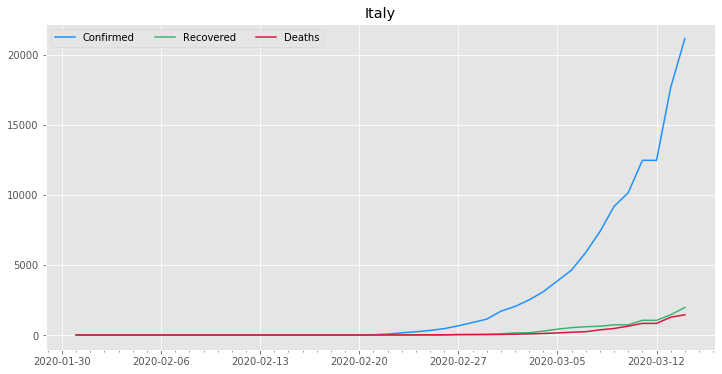

In [427]:
plot_country(country='Italy')

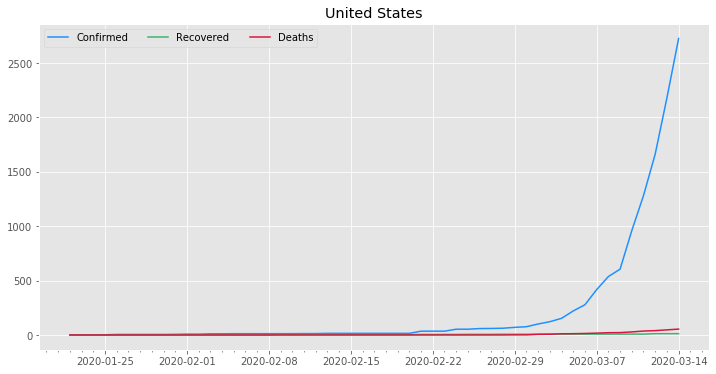

In [428]:
plot_country(country='United States')

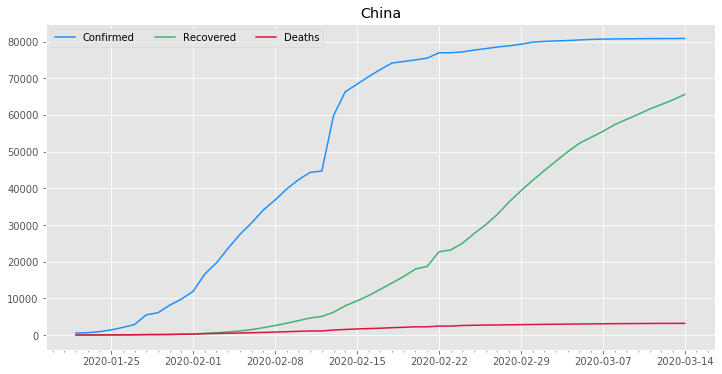

In [429]:
plot_country(country='China')

## 5. TORP COVID-19 

In [430]:
# Data from Last Report by Country
data_last_report = data.loc[data.index.get_level_values(1) == datetime.strptime(files[-1],'%m-%d-%Y')]
# TOP Country List by Confirmed Cases
top_list = data_last_report.sort_values(by='Confirmed',ascending=False)['Confirmed'][:10].index.get_level_values(0).tolist()

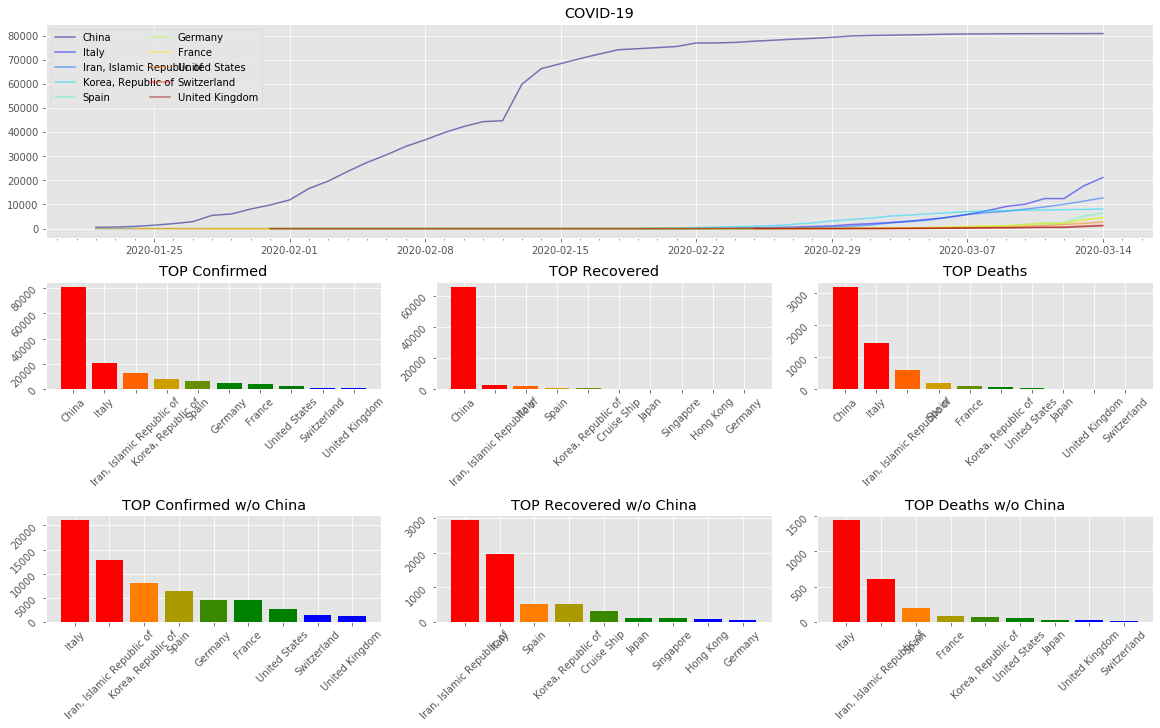

In [431]:
fig = plt.figure(figsize=(16,10),constrained_layout=True)
gs = GridSpec(4, 3, figure=fig)
ax1 = fig.add_subplot(gs[:2, :])
ax2 = fig.add_subplot(gs[2, :1])
ax3 = fig.add_subplot(gs[2, 1:2])
ax4 = fig.add_subplot(gs[2, -1])
ax5 = fig.add_subplot(gs[3, :1])
ax6 = fig.add_subplot(gs[3, 1:2])
ax7 = fig.add_subplot(gs[3, -1])
# Colors
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))
clist = [(0, "red"), (0.125, "red"), (0.25, "orange"), (0.5, "green"), 
         (0.7, "green"), (0.75, "blue"), (1, "blue")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N1 = 10
N2 = 9
x1 = np.arange(N1).astype(float)
x2 = np.arange(N2).astype(float)
y1 = np.random.uniform(0, 5, size=(N1,))
y2 = np.random.uniform(0, 5, size=(N2,))
# Axis 1
for country in top_list:
    ax1.plot(data.loc[country,['Confirmed']],label=country,color=next(colors),alpha=0.5)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_minor_locator(mdates.DayLocator())
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1, 0.20, 0),mode="expand",ncol=2)
ax1.set_title('COVID-19')
# Axis 2, 5
ax2.bar(data_last_report.sort_values(by='Confirmed',ascending=False)['Confirmed'][:10].index.get_level_values(0),data_last_report.sort_values(by='Confirmed',ascending=False)['Confirmed'][:10].values,color=rvb(x1/N1))
ax2.tick_params(labelrotation=45)
ax2.title.set_text('TOP Confirmed')
ax5.bar(data_last_report.sort_values(by='Confirmed',ascending=False)['Confirmed'][1:10].index.get_level_values(0),data_last_report.sort_values(by='Confirmed',ascending=False)['Confirmed'][1:10].values,color=rvb(x2/N2))
ax5.tick_params(labelrotation=45)
ax5.title.set_text('TOP Confirmed w/o China')
# Axis 3, 6
ax3.bar(data_last_report.sort_values(by='Recovered',ascending=False)['Recovered'][:10].index.get_level_values(0),data_last_report.sort_values(by='Recovered',ascending=False)['Recovered'][:10].values,color=rvb(x1/N1))
ax3.tick_params(labelrotation=45)
ax3.title.set_text('TOP Recovered')
ax6.bar(data_last_report.sort_values(by='Recovered',ascending=False)['Recovered'][1:10].index.get_level_values(0),data_last_report.sort_values(by='Recovered',ascending=False)['Recovered'][1:10].values,color=rvb(x2/N2))
ax6.tick_params(labelrotation=45)
ax6.title.set_text('TOP Recovered w/o China')
# Axis 4, 7
ax4.bar(data_last_report.sort_values(by='Deaths',ascending=False)['Deaths'][:10].index.get_level_values(0),data_last_report.sort_values(by='Deaths',ascending=False)['Deaths'][:10].values,color=rvb(x1/N1))
ax4.tick_params(labelrotation=45)
ax4.title.set_text('TOP Deaths')
ax7.bar(data_last_report.sort_values(by='Deaths',ascending=False)['Deaths'][1:10].index.get_level_values(0),data_last_report.sort_values(by='Deaths',ascending=False)['Deaths'][1:10].values,color=rvb(x2/N2))
ax7.tick_params(labelrotation=45)
ax7.title.set_text('TOP Deaths w/o China')

## 6. Map Plot Bokeh

In [432]:
# Paises del Último Report
print('Countries Affected by COVID-19:',len(data_last_report.index.get_level_values(0)))

Countries Affected by COVID-19: 141


In [433]:
coord = pd.read_csv('https://raw.githubusercontent.com/albertyw/avenews/master/old/data/average-latitude-longitude-countries.csv')
coord.head()

,ISO 3166 Country Code,Country,Latitude,Longitude
0,AD,Andorra,42.50,1.50
1,AE,United Arab Emirates,24.00,54.00
2,AF,Afghanistan,33.00,65.00
3,AG,Antigua and Barbuda,17.05,-61.80
4,AI,Anguilla,18.25,-63.17


In [435]:
countries = data_last_report.index.get_level_values(0).values.tolist()
countries_to_fix = []
for country in countries:
    if country not in coord['Country'].values.tolist():
        print(country+' not in this dataframe')
        countries_to_fix.append(country)
        #print(coord[coord['Country'].str.contains(country)]['Country'].values)

Congo (Kinshasa) not in this dataframe
Cruise Ship not in this dataframe


In [438]:
maps = pd.merge(data_last_report,coord,on=['Country'])
maps.head()

,Country,Confirmed,Recovered,Deaths,ISO 3166 Country Code,Latitude,Longitude
0,Afghanistan,11.0,0.0,0.0,AF,33.00,65.0
1,Albania,38.0,0.0,1.0,AL,41.00,20.0
2,Algeria,37.0,12.0,3.0,DZ,28.00,3.0
3,Andorra,1.0,1.0,0.0,AD,42.50,1.5
4,Antigua and Barbuda,1.0,0.0,0.0,AG,17.05,-61.8


In [449]:
maps["size"] = np.log(maps["Confirmed"]*100)
maps.plot_bokeh.map(
    x="Longitude",
    y="Latitude",
    size="size",
    hovertool_string="""<h2> @{Country} </h2> 
    
                        <h3> Confirmed: @{Confirmed} </h3>
                        <h3> Recovered: @{Recovered} </h3>
                        <h3> Deaths: @{Deaths} </h3>""",
    tile_provider="CARTODBPOSITRON_RETINA",
    colormap="Plasma",
    colormap_uselog=False,
    marker="circle",
    category="Confirmed",
    legend='Confirmed Cases',
    alpha=0.6,
    figsize=(900, 600),
    title="COVID-19")

Figure(id='3569', ...)

In [442]:
codes = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
codes.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
